# Systematic filtering

This is a template script for systematic analysis of unique ion counts in different conditions of a dataset

In [1]:
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
adata = sc.read('/g/alexandr/Marius/shared/Lx_Glioblastoma.h5ad')

In [3]:
# number of ions that should be detected in a cell to be included in the analysis
min_ions = 100
# the condition column should be in adata.obs.
condition_column = 'condition'

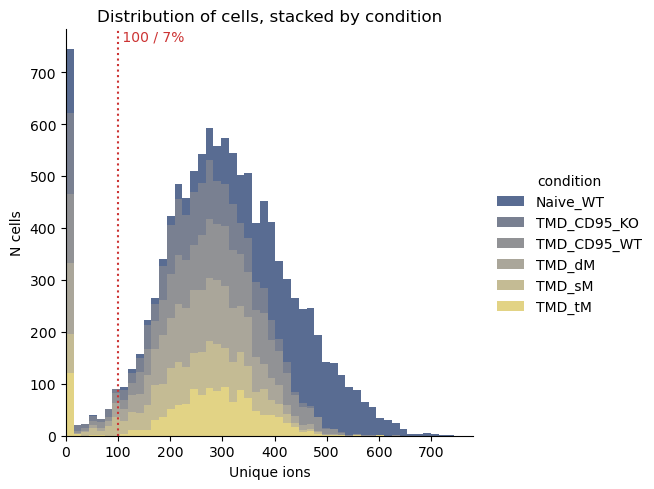

In [4]:
# calculate the cutoff percentage of ions that should be present in each cell
percent_ions = min_ions / len(adata.var_names)

cell_qc, ion_qc = sc.pp.calculate_qc_metrics(adata, percent_top=None)
# qc table and adata.obs should have the same index
cell_qc_joined = pd.merge(adata.obs[[condition_column]], cell_qc, left_index=True, right_index=True)

# sometimes multiple='stack' can hinder comparison between conditions
filter_cell_plot = sns.displot(data=cell_qc_joined, x="n_genes_by_counts", bins=50, linewidth=0, hue=condition_column, palette='cividis', multiple='stack')
ax = filter_cell_plot.axes.flat[0]
ax.set_xlabel('Unique ions')
ax.set_ylabel('N cells')
ax.set_xlim(left=0)
ax.set_title('Distribution of cells, stacked by condition')

# printing the cutoff as a vertical line with relative and absolute cutoff values
ax.axvline(x=min_ions, linestyle=":", c="#CC3333")
ax.text(x=min_ions, y=ax.get_ylim()[1], s=f" {min_ions} / {percent_ions:.0%}", va='top', ha='left', color="#CC3333")

filter_cell_plot.tight_layout()